# TFG

In [1]:
# Import necessary ROOT modules for data analysis
from ROOT import *
from ROOT import RDataFrame

# Import additional libraries for file handling and data processing
import glob
import pandas as pd
import numpy as np

# Import libraries for plotting
import mplhep as hep
import matplotlib.pyplot as plt

# Set the plotting style to LHCb2, a style specific for High Energy Physics
plt.style.use(hep.style.LHCb2)

# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams["text.usetex"] = True

# Additional code for your data analysis


Welcome to JupyROOT 6.26/06


In [2]:

# Use glob to find all ROOT files in the specified directory and subdirectories
list_file = glob.glob("/scratch41/belin/gangadir/workspace/samuel.belin/LocalXML/92/*/output/*.root")

# Create a TChain to concatenate multiple ROOT files
ch = TChain("mct1/EventTuple")

# Add the first 6 ROOT files from the list to the TChain
for name in list_file[:6]:
    ch.Add(name)
 
# Copy events from the TChain where the number of primary vertices (nPVs) is equal to 1
ch3 = ch.CopyTree("nPVs==1")

# Create a RDataFrame from the copied tree
df = RDataFrame(ch3)

# Convert the RDataFrame to a dictionary of numpy arrays
dic = df.AsNumpy()

# Convert the dictionary to a pandas DataFrame
pd_df_all = pd.DataFrame(dic)

# Calculate the number of forward tracks and add it as a new column in the DataFrame
pd_df_all["nForwTracks"] = pd_df_all["nVeloTracks"] - pd_df_all["nBackTracks"]

# Print the names of the variables (keys of the dictionary)
print("variables", dic.keys())


variables dict_keys(['BCID', 'BCType', 'EventInSequence', 'GpsTime', 'HLT1TCK', 'HLT2TCK', 'H_MCSel', 'L0DUTCK', 'OdinTCK', 'PVCHI2', 'PVNDOF', 'PVNTRACKS', 'PVX', 'PVXERR', 'PVY', 'PVYERR', 'PVZ', 'PVZERR', 'Polarity', 'eEcal', 'eHcal', 'ePrs', 'eSPD', 'etEcal', 'etHcal', 'eventNumber', 'fEcal', 'fHcal', 'fPrs', 'fSPD', 'nBackTracks', 'nDownstreamTracks', 'nITClusters', 'nLongTracks', 'nMuonCoordsS0', 'nMuonCoordsS1', 'nMuonCoordsS2', 'nMuonCoordsS3', 'nMuonCoordsS4', 'nMuonTracks', 'nOTClusters', 'nPV', 'nPVs', 'nRich1Hits', 'nRich2Hits', 'nSPDHits', 'nTTClusters', 'nTTracks', 'nTracks', 'nUpstreamTracks', 'nVeloClusters', 'nVeloTracks', 'runNumber'])


In [30]:
# Define the list of occupancy-related variables
occupancy_variables = [
    "PVNTRACKS", "nDownstreamTracks", "nITClusters", "nOTClusters", 
    "nRich1Hits", "nRich2Hits", "nSPDHits", "nTTClusters", 
    "nTTracks", "nUpstreamTracks", "nVeloClusters", "nVeloTracks"
]

# Uncomment the line corresponding to the set of selected variables you want to use
# selected_variables = ["nForwTracks", "nSPDHits", "nTTClusters", "eEcal", "H_MCSel"]
# selected_variables = ["nForwTracks", "nSPDHits", "nTTClusters", "eEcal", "H_MCSel"]
# selected_variables = ["nForwTracks", "nTTClusters", "nITClusters", "nOTClusters", "H_MCSel"]
# selected_variables = ["nForwTracks", "nTTClusters", "nRich1Hits", "nRich2Hits", "H_MCSel"]

# Use the following set of selected variables
selected_variables = [
    "nForwTracks", "nTTClusters", "nOTClusters", "nITClusters", 
    "nRich1Hits", "nRich2Hits", "nSPDHits", "eEcal", "H_MCSel"
]

# Uncomment the line corresponding to the set of selected variables you want to use
# selected_variables = ["nForwTracks", "nRich1Hits", "nRich2Hits", "H_MCSel"]

# Calculate the index to split test and training data with 70% for training and 30% for testing
percentage_data = 0.7

# Select the variables for the pandas DataFrame
pd_df = pd_df_all[selected_variables]

# Copy the list of selected variables for training, excluding the target variable 'H_MCSel'
selected_variables_training = selected_variables.copy()
selected_variables_training.remove('H_MCSel')

# Create the name for the plot based on the selected variables and data split percentages
plot_name = "_".join(selected_variables) + f"_testing_{percentage_data}_training_{1-percentage_data}.pdf"



correlation_matrix.index Index(['nForwTracks', 'nTTClusters', 'nOTClusters', 'nITClusters',
       'nRich1Hits', 'nRich2Hits', 'nSPDHits', 'eEcal', 'H_MCSel'],
      dtype='object')


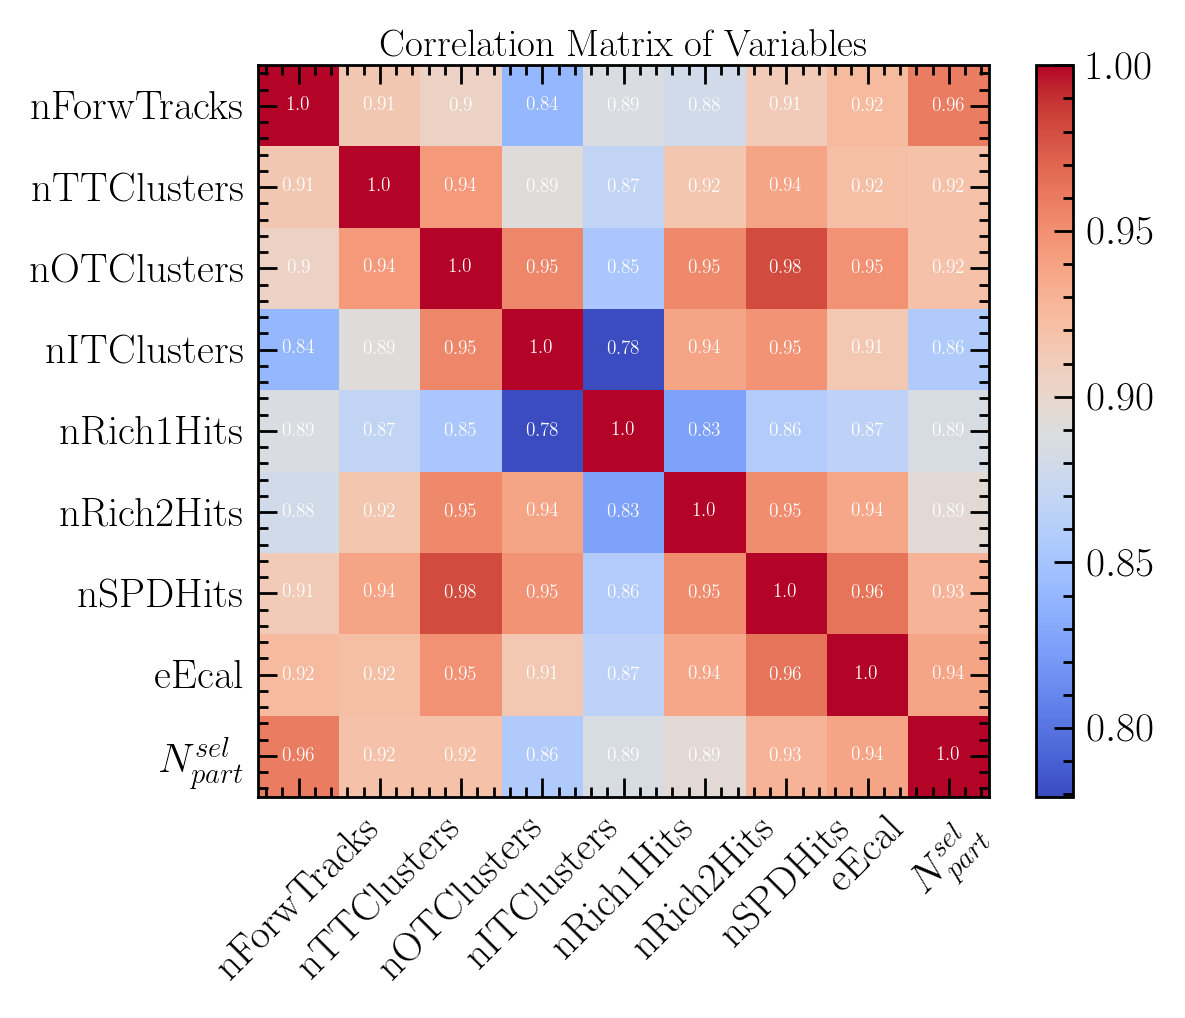

In [31]:
# Calculate the correlation matrix of the selected variables DataFrame
correlation_matrix = pd_df.corr()

# Set up the figure for the correlation matrix plot
plt.figure(figsize=(12, 10))

# Display the correlation matrix as an image with a color map
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Adding ticks and labels
ticks = np.arange(len(correlation_matrix.columns))
plt.xticks(ticks, correlation_matrix.columns, rotation=45)

# Print the correlation matrix index for debugging or verification purposes
print("correlation_matrix.index", correlation_matrix.index)

# Manually set the y-axis tick labels
plt.yticks(ticks, ['nForwTracks', 'nTTClusters', 'nOTClusters', 'nITClusters', 
                   'nRich1Hits', 'nRich2Hits', 'nSPDHits', 'eEcal', '$N^{sel}_{part}$'])

# Manually set the x-axis tick labels and rotate them for better readability
plt.xticks(ticks, ['nForwTracks', 'nTTClusters', 'nOTClusters', 'nITClusters', 
                   'nRich1Hits', 'nRich2Hits', 'nSPDHits', 'eEcal', '$N^{sel}_{part}$'], rotation=45)

# Adding grid lines for readability, but turning the grid off to avoid double grid visual
plt.grid(False)

# Optional: Add annotations inside the squares with correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                        ha="center", va="center", color="w")

# Add a title to the plot
plt.title('Correlation Matrix of Variables')

# Save the plot to a file
plt.savefig("Plots/Correlation_Matrix_" + plot_name)

# Adjust the plot layout to ensure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()


In [5]:
# Import numpy for numerical operations
import numpy as np

# Import linear models from scikit-learn for machine learning tasks
import sklearn.linear_model

In [6]:
# Initialize a linear regression model from scikit-learn
linear_regression_model = sklearn.linear_model.LinearRegression()

In [7]:
# Calculate the total number of rows in the DataFrame
total_rows = pd_df.shape[0]

# Compute the index to split the DataFrame based on the percentage_data
split_index = int(total_rows * percentage_data)  

# Split the DataFrame into training and testing sets
train_pd_df_all = pd_df[:split_index]  # Training set
test_pd_df_all = pd_df[split_index:]    # Testing set
 

Divido en conxunto de entrenamento e conxunto de proba os datos.

In [8]:
print(f"We use {train_pd_df_all.shape[0]} entries for training.")
print(f"We use {test_pd_df_all.shape[0]} entries for testing.")



We use 195426 entries for training.
We use 83754 entries for testing.


new_pd_df só ten 5 variables, para ter todas as variables uso pd_df.

In [9]:
train_pd_df_all.head()

,nForwTracks,nTTClusters,nOTClusters,nITClusters,nRich1Hits,nRich2Hits,nSPDHits,H_MCSel
0,243,1920,9246,1290,6595,5874,744,129.0
1,200,1327,7519,1226,4543,5407,520,102.0
2,410,2492,12020,2067,8802,8713,880,178.0
3,242,2057,9370,1715,6412,7040,702,111.0
4,140,944,5841,860,7124,2603,377,59.0


In [10]:
train_pd_df=train_pd_df_all.copy()
test_pd_df=test_pd_df_all.copy()

In [11]:
# Drop the 'H_MCSel' column from the training DataFrame
train_pd_df.drop(columns=["H_MCSel"], axis=1, inplace=True)

# Drop the 'H_MCSel' column from the testing DataFrame
test_pd_df.drop(columns=["H_MCSel"], axis=1, inplace=True)







Collo o conxunto de proba e elimino a variable de H_MCSel, que é a que non se pode escalar e a que quero conseguir.

In [12]:
print(f"We use {train_pd_df.shape[0]} entries for training.")
print(f"We use {test_pd_df.shape[0]} entries for testing.")



We use 195426 entries for training.
We use 83754 entries for testing.


In [13]:
train_pd_df_all.head()

,nForwTracks,nTTClusters,nOTClusters,nITClusters,nRich1Hits,nRich2Hits,nSPDHits,H_MCSel
0,243,1920,9246,1290,6595,5874,744,129.0
1,200,1327,7519,1226,4543,5407,520,102.0
2,410,2492,12020,2067,8802,8713,880,178.0
3,242,2057,9370,1715,6412,7040,702,111.0
4,140,944,5841,860,7124,2603,377,59.0


In [14]:
train_pd_df.head()

,nForwTracks,nTTClusters,nOTClusters,nITClusters,nRich1Hits,nRich2Hits,nSPDHits
0,243,1920,9246,1290,6595,5874,744
1,200,1327,7519,1226,4543,5407,520
2,410,2492,12020,2067,8802,8713,880
3,242,2057,9370,1715,6412,7040,702
4,140,944,5841,860,7124,2603,377


In [15]:
# Import SimpleImputer for handling missing values and StandardScaler for feature scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler for feature standardization
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
train_pd_sc = scaler.fit_transform(train_pd_df)

# Convert the scaled training data back into a pandas DataFrame
train_pd_df_sc = pd.DataFrame(train_pd_sc, columns=list(train_pd_df.columns), index=train_pd_df.index)

# Transform the test data using the same scaler (note: do not fit the scaler again)
test_pd_sc = scaler.transform(test_pd_df)

# Convert the scaled test data back into a pandas DataFrame
test_pd_df_sc = pd.DataFrame(test_pd_sc, columns=list(test_pd_df.columns), index=test_pd_df.index)


In [16]:
print("test_pd_df_sc",len(test_pd_df_sc))

test_pd_df_sc 83754


,nForwTracks,nTTClusters,nOTClusters,nITClusters,nRich1Hits,nRich2Hits,nSPDHits,H_MCSel
0,243,1920,9246,1290,6595,5874,744,129.0
1,200,1327,7519,1226,4543,5407,520,102.0
2,410,2492,12020,2067,8802,8713,880,178.0
3,242,2057,9370,1715,6412,7040,702,111.0
4,140,944,5841,860,7124,2603,377,59.0
...,...,...,...,...,...,...,...,...
195421,307,1930,10477,1892,6996,5521,776,140.0
195422,76,820,5530,882,3052,2662,376,48.0
195423,119,785,4785,786,3770,3297,360,63.0
195424,151,1246,6756,1315,3737,3883,518,86.0


Escalo as variables do eixo x

In [17]:

# Combine the selected training variables into a single numpy array
x = np.c_[train_pd_df_sc[selected_variables_training]]

# Create a DataFrame for the target variable 'H_MCSel' with the same length as x
reduced_pd_df = pd_df[:len(x)]

# Combine the target variable 'H_MCSel' into a single numpy array
y = np.c_[train_pd_df_all["H_MCSel"]]


In [18]:
# Fit the linear regression model using the training data (features `x` and target `y`)
linear_regression_model.fit(x, y)


LinearRegression()

In [19]:
# Combine the selected test variables into a single numpy array
xtest = np.c_[test_pd_df_sc[selected_variables_training]]

# Combine the test target variable 'H_MCSel' into a single numpy array
ytest = np.c_[test_pd_df_all["H_MCSel"]]

# Use the trained linear regression model to predict the target values for the test data
ypredlinear = linear_regression_model.predict(xtest)

# Calculate the Root Mean Squared Error (RMSE) of the linear regression predictions
RMSlineal = np.sqrt(np.mean((ytest - ypredlinear) ** 2))


In [20]:
plt.title(f"Modelo linear: {selected_variables_training} ")
plt.plot(xtest,linear_regression_model.predict(xtest),".", color="blue", label="Axuste")
plt.plot(xtest,ytest,".", color="pink", label="Datos experimentais")
plt.xlabel("-".join(selected_variables_training),fontsize=40)
plt.ylabel("H_MCSel",x=0,y=0.55,fontsize=40)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.text(0.05, 0.95, f'RMS : {RMSlineal:.2f}', transform=plt.gca().transAxes, 
         fontsize=20, 
         verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=2))  
plt.savefig("Plots/Linear_model_"+plot_name)


Error in callback <function flush_figures at 0x7eff8f5156c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Use the trained linear regression model to predict target values for the test data
ypredlinear = linear_regression_model.predict(xtest)

Text(0.5, 1.0, "Histograma modelo lineal variables: ['nForwTracks', 'nTTClusters', 'nOTClusters', 'nITClusters', 'nRich1Hits', 'nRich2Hits', 'nSPDHits']")

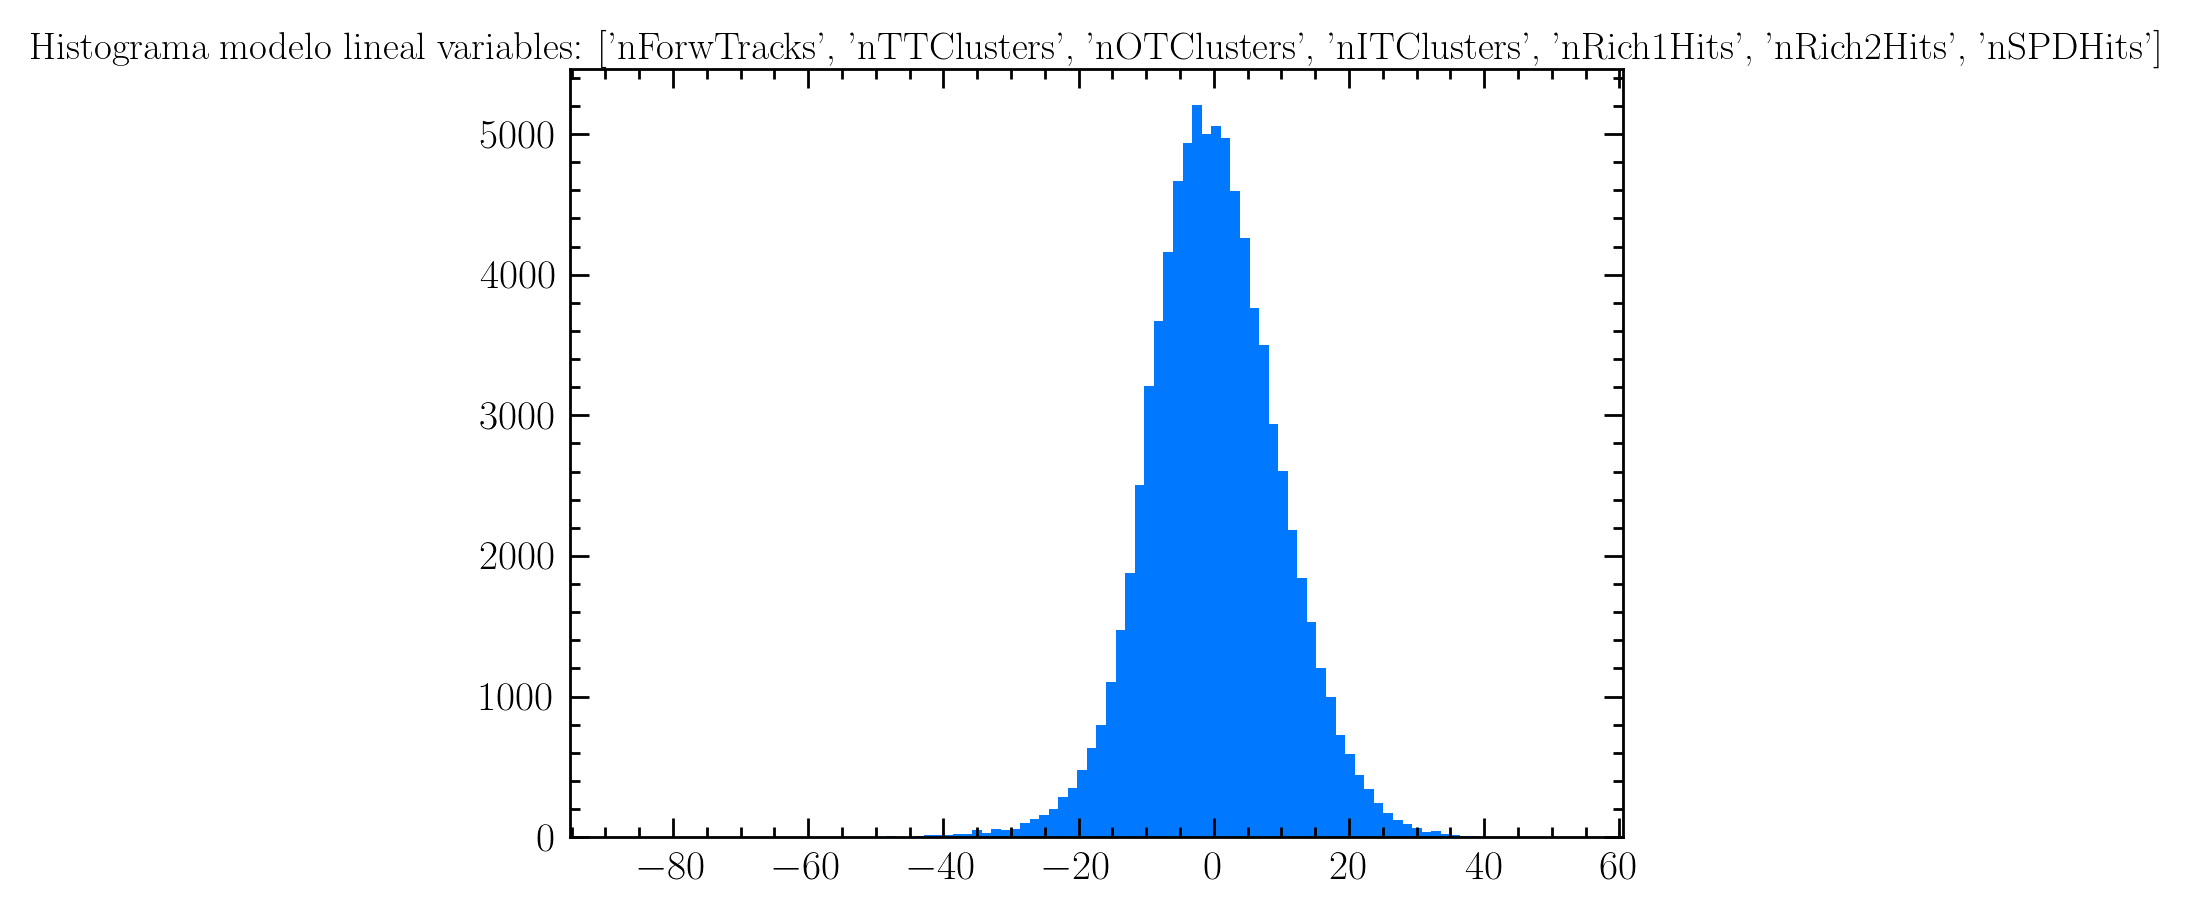

In [ ]:
plt.hist(ytest-ypredlinear,bins=100)
plt.title(f"Histograma modelo lineal variables: {selected_variables_training}")

In [ ]:
RMSlineal = np.sqrt(np.mean((ytest-ypredlinear)**2))

In [ ]:
print(f"RMS lineal {len(selected_variables_training)} variables =", RMSlineal)

RMS lineal 7 variables = 9.786511969645915


In [ ]:
import sklearn.neighbors

In [ ]:
# Initialize a K-Nearest Neighbors Regressor model with 50 neighbors
neighborsmodel = sklearn.neighbors.KNeighborsRegressor(n_neighbors=50)


In [ ]:
neighborsmodel.fit(x,y)

KNeighborsRegressor(n_neighbors=50)

In [ ]:
xtest = np.c_[test_pd_df_sc[selected_variables_training]]
ytest = np.c_[test_pd_df_all["H_MCSel"]]

ypredkneighbors= neighborsmodel.predict(xtest)
RMSkneighbors = np.sqrt(np.mean((ytest-ypredkneighbors)**2))


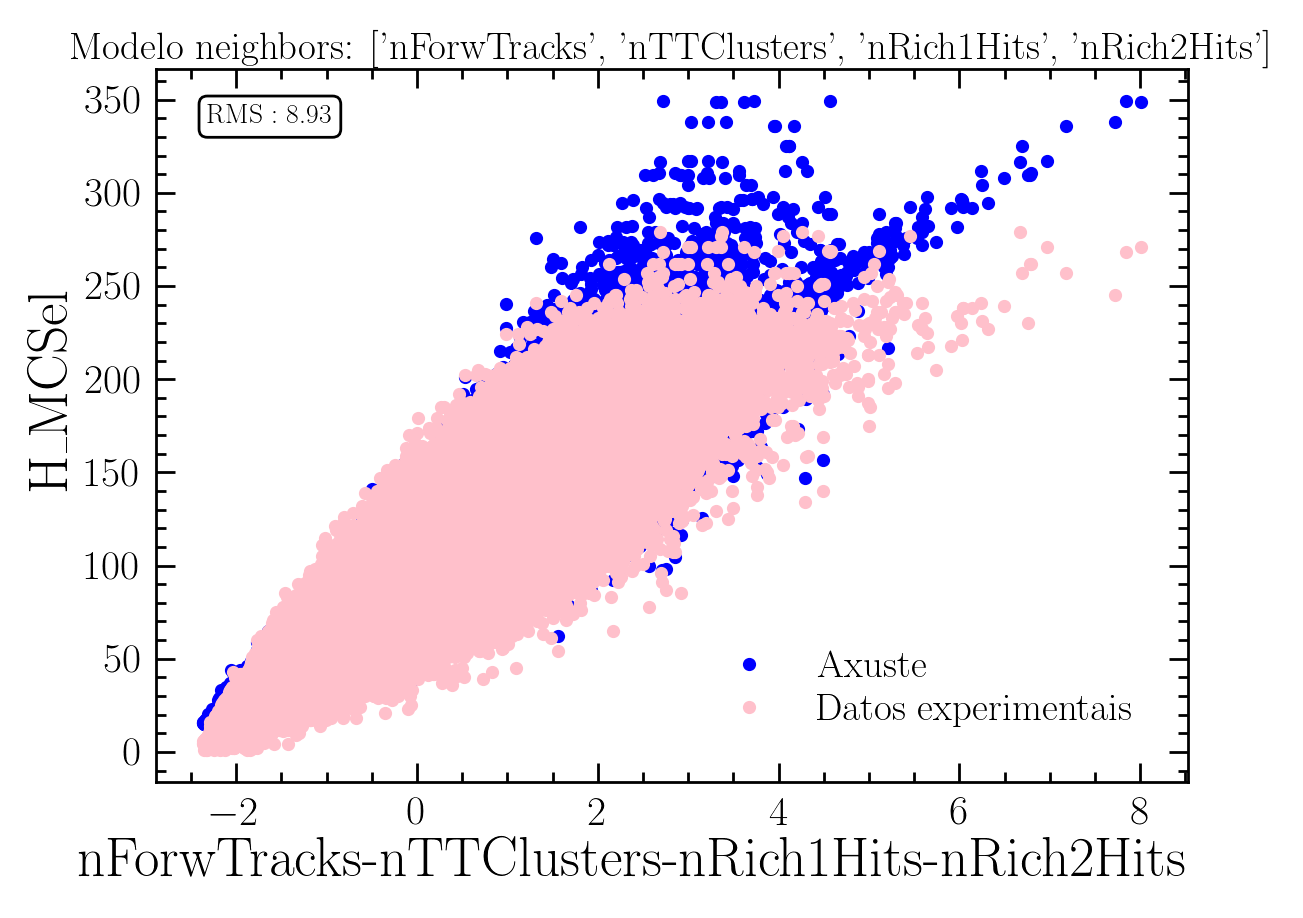

In [ ]:
plt.title(f"Modelo neighbors: {selected_variables_training} ")
plt.plot(xtest,linear_regression_model.predict(xtest),".", color="blue", label="Axuste")
plt.plot(xtest,ytest,".", color="pink", label="Datos experimentais")
plt.xlabel("-".join(selected_variables_training),fontsize=40)
plt.ylabel("H_MCSel",x=0,y=0.55,fontsize=40)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.text(0.05, 0.95, f'RMS : {RMSkneighbors:.2f}', transform=plt.gca().transAxes, 
         fontsize=20, 
         verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=2))  
plt.savefig("Plots/Kneighbors_model_"+plot_name)



Text(0.5, 1.0, 'Histograma modelo Kneighbors')

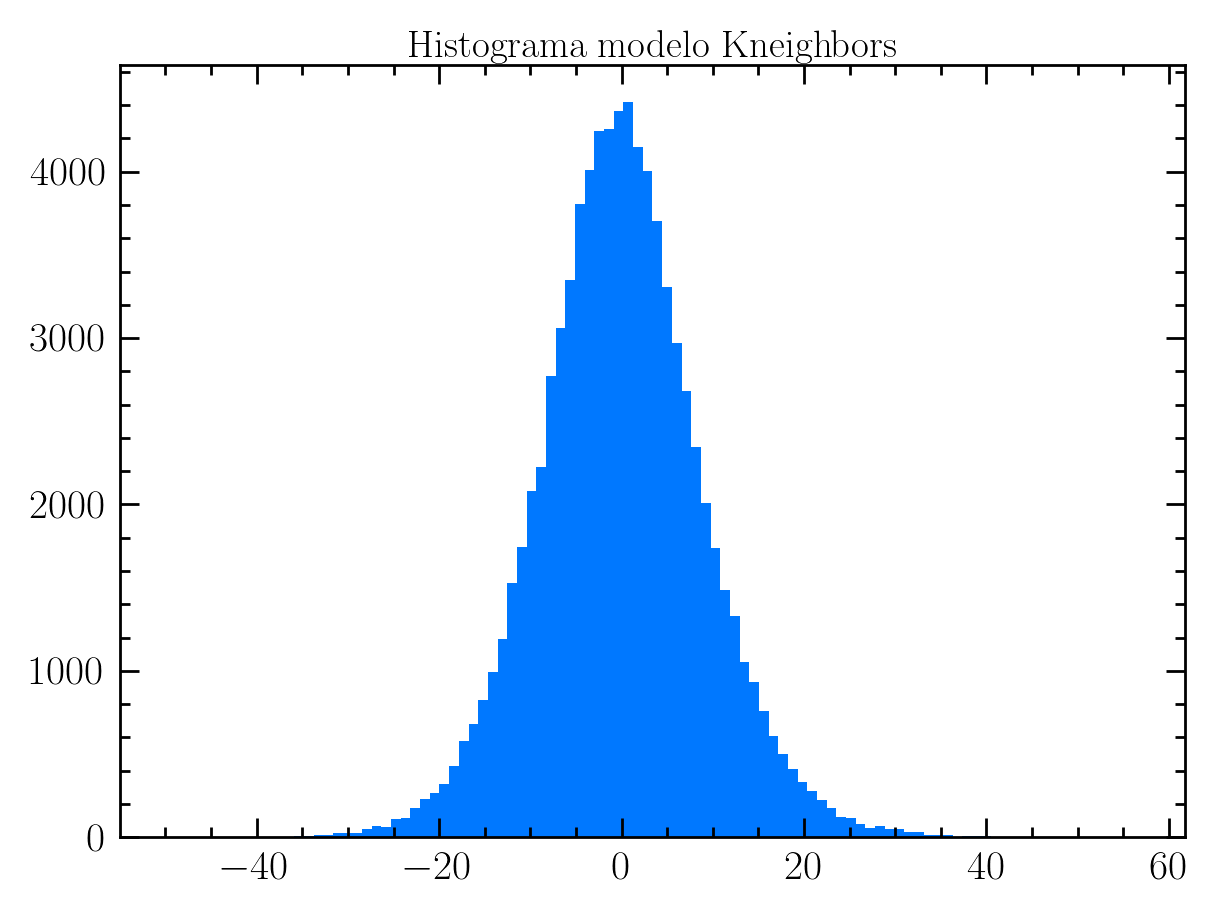

In [ ]:
ypredkneighbors= neighborsmodel.predict(xtest)
plt.hist(ytest-ypredkneighbors,bins=100); plt.title("Histograma modelo Kneighbors")

In [ ]:
RMSkneighbors = np.sqrt(np.mean((ytest-ypredkneighbors)**2))
print(f"RMS kneighbors  {len(selected_variables_training)} variables =", RMSkneighbors)

RMS kneighbors  4 variables = 8.9334615534749


In [ ]:
print(f"RMS kneighbors  {len(selected_variables_training)} variables =", RMSkneighbors )
print(f"RMS linear  {len(selected_variables_training)} variables =", RMSlineal )

RMS kneighbors  4 variables = 8.9334615534749
RMS linear  4 variables = 10.19829241696635
